In [4]:
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix, greycoprops #untuk ekstraksi ciri..
from PIL import Image
import sounddevice as sd
import matplotlib.pyplot as plt
from pydub import AudioSegment
from sklearn.neighbors import KNeighborsClassifier
import os
from scipy.io import wavfile
import wave


In [ ]:
#siapkan dataset
#ubah format dataset menjadi MONO (tadinya stereo)
#kita ambil spektogram masing2 audio,
#kita ambil CIRI dari spektogram menggunakan metode GLCM
#dari fitur2 GLCM di bentuk dataframe, lalu pilih 2 fitur yang paling menentukan kita ngomong halo/hai

processing: hai: Recording (10).wav


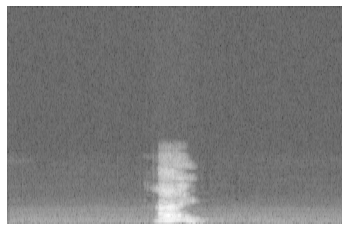

processing: hai: Recording (2).wav


C:\Users\igana\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


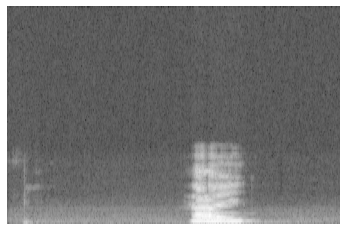

processing: hai: Recording (3).wav


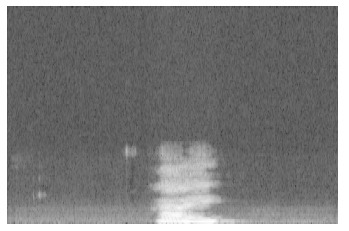

processing: hai: Recording (4).wav


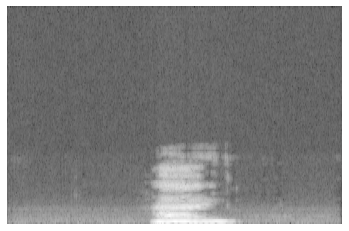

processing: hai: Recording (5).wav


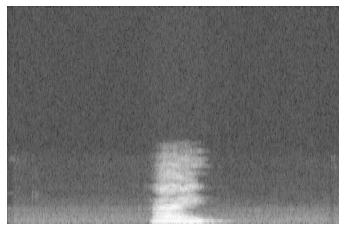

processing: hai: Recording (6).wav


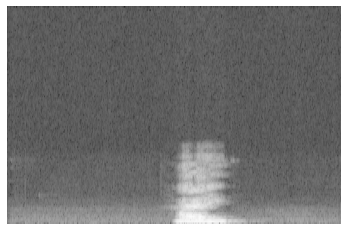

processing: hai: Recording (7).wav


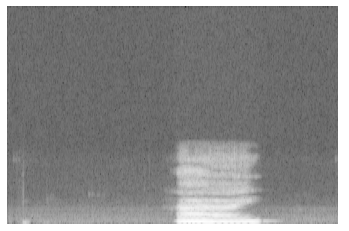

processing: hai: Recording (8).wav


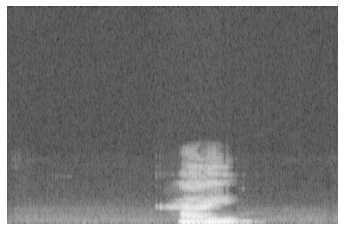

processing: hai: Recording (9).wav


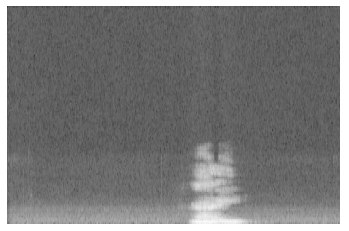

processing: hai: Recording.wav


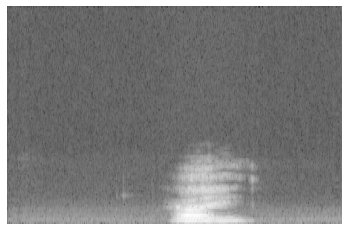

processing: halo: Recording (10).wav


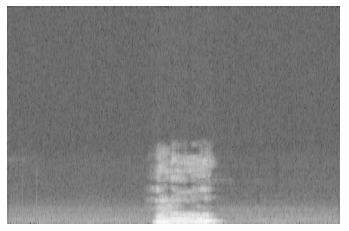

processing: halo: Recording (2).wav


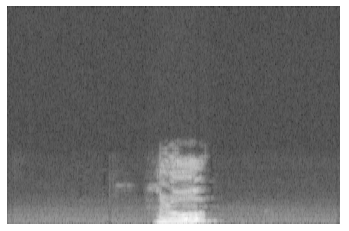

processing: halo: Recording (3).wav


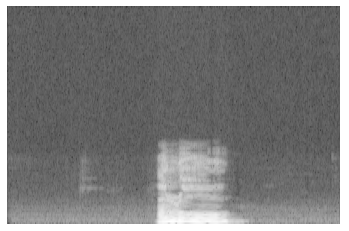

processing: halo: Recording (4).wav


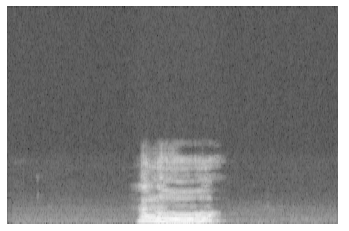

processing: halo: Recording (5).wav


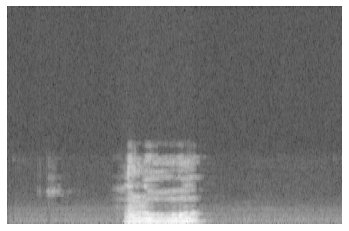

processing: halo: Recording (6).wav


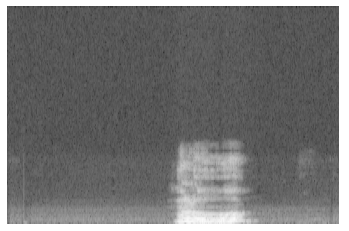

processing: halo: Recording (7).wav


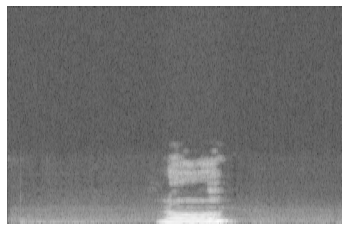

processing: halo: Recording (8).wav


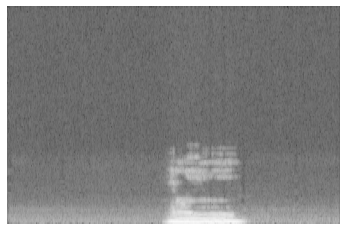

processing: halo: Recording (9).wav


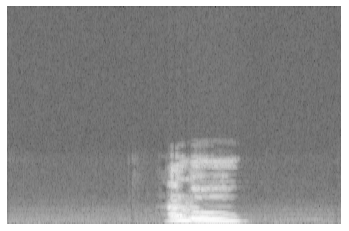

processing: halo: Recording.wav


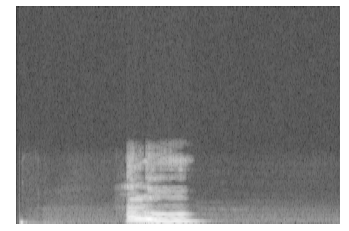

In [8]:
dataset='./dataset'
for folders in os.listdir(dataset):
    lala=0;
    for files in os.listdir(dataset+'/'+folders):
        print("processing: "+folders+': '+files)
        sound=AudioSegment.from_wav(dataset+'/'+folders+'/'+files)
        sound=sound.set_channels(1)
        sound.export(dataset+'/'+folders+'/'+str(lala)+'.wav',format='wav')
        samplingFrequency, signalData=wavfile.read(dataset+'/'+folders+'/'+str(lala)+'.wav')
        fitur=plt.specgram(signalData, Fs=samplingFrequency, cmap='gray')
        plt.axis('off')
        plt.savefig('./specgram/'+folders+'/'+str(lala)+'.jpg',bbox_inches='tight')
        lala=lala+1
        plt.show()


In [10]:
df=[]
dataset='./specgram'
for folders in os.listdir(dataset):
    lala=0;
    for files in os.listdir(dataset+'/'+folders):
        print("processing: "+folders+': '+files)
        image=Image.open(dataset+'/'+folders+'/'+files)
        arr_grey=np.array(image.convert('L'))
        glcm=greycomatrix(arr_grey, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        cont=greycoprops(glcm, 'contrast')
        diss=greycoprops(glcm, 'dissimilarity')
        homo=greycoprops(glcm, 'homogeneity')
        eng=greycoprops(glcm, 'energy')
        corr=greycoprops(glcm, 'correlation')
        ASM=greycoprops(glcm, 'ASM')

        df.append([files,cont,diss,homo,eng,corr,ASM,folders])


processing: hai: 0.jpg
processing: hai: 1.jpg
processing: hai: 2.jpg
processing: hai: 3.jpg
processing: hai: 4.jpg
processing: hai: 5.jpg
processing: hai: 6.jpg
processing: hai: 7.jpg
processing: hai: 8.jpg
processing: hai: 9.jpg
processing: halo: 0.jpg
processing: halo: 1.jpg
processing: halo: 2.jpg
processing: halo: 3.jpg
processing: halo: 4.jpg
processing: halo: 5.jpg
processing: halo: 6.jpg
processing: halo: 7.jpg
processing: halo: 8.jpg
processing: halo: 9.jpg


In [11]:
df

[['0.jpg',
  array([[151.90044534]]),
  array([[5.2701025]]),
  array([[0.24396864]]),
  array([[0.07862823]]),
  array([[0.96233001]]),
  array([[0.0061824]]),
  'hai'],
 ['1.jpg',
  array([[187.49487486]]),
  array([[6.02878539]]),
  array([[0.22681731]]),
  array([[0.07707437]]),
  array([[0.96451814]]),
  array([[0.00594046]]),
  'hai'],
 ['2.jpg',
  array([[185.35495348]]),
  array([[6.14442454]]),
  array([[0.22537192]]),
  array([[0.07831]]),
  array([[0.96489924]]),
  array([[0.00613246]]),
  'hai'],
 ['3.jpg',
  array([[175.19414589]]),
  array([[5.70307757]]),
  array([[0.23323499]]),
  array([[0.07569837]]),
  array([[0.96067029]]),
  array([[0.00573024]]),
  'hai'],
 ['4.jpg',
  array([[204.96973429]]),
  array([[6.27137135]]),
  array([[0.22280749]]),
  array([[0.07797764]]),
  array([[0.96357863]]),
  array([[0.00608051]]),
  'hai'],
 ['5.jpg',
  array([[193.98547047]]),
  array([[6.13524407]]),
  array([[0.22392436]]),
  array([[0.07589697]]),
  array([[0.96213681]]),
  

In [13]:
df=pd.DataFrame(df,columns=['file','kontras','entropi','homogen','energi','korelasi','ASM','jenis'])

In [14]:
df

,file,kontras,entropi,homogen,energi,korelasi,ASM,jenis
0,0.jpg,[[151.90044534010053]],[[5.270102502861125]],[[0.24396864388786305]],[[0.07862822629615958]],[[0.9623300102819161]],[[0.006182397970480081]],hai
1,1.jpg,[[187.49487485694385]],[[6.028785390854358]],[[0.22681730834444802]],[[0.07707437408125169]],[[0.9645181414464489]],[[0.005940459140016721]],hai
2,2.jpg,[[185.35495347564316]],[[6.144424540976266]],[[0.22537191909743437]],[[0.0783100028463585]],[[0.96489924185446]],[[0.006132456545796676]],hai
3,3.jpg,[[175.19414589242174]],[[5.703077573767229]],[[0.23323498523552355]],[[0.07569836717376405]],[[0.9606702946299166]],[[0.005730242792773998]],hai
4,4.jpg,[[204.96973428869984]],[[6.271371348957556]],[[0.22280748983568488]],[[0.07797764390296229]],[[0.9635786297751555]],[[0.006080512948657191]],hai
5,5.jpg,[[193.9854704682291]],[[6.135244066278551]],[[0.22392436034940044]],[[0.07589696686957258]],[[0.9621368145458546]],[[0.005760349580000997]],hai
6,6.jpg,[[152.0139946260636]],[[5.349243668209187]],[[0.246842272288528]],[[0.08136531930184186]],[[0.9673938965514862]],[[0.0066203151850906805]],hai
7,7.jpg,[[199.8889759665622]],[[6.4046997064238465]],[[0.21974156087380448]],[[0.0782241057733931]],[[0.9640555148969118]],[[0.006119010724046992]],hai
8,8.jpg,[[177.92690451311148]],[[5.934442951684332]],[[0.227833144793987]],[[0.07704155158039441]],[[0.9632397810239867]],[[0.005935400669914573]],hai
9,9.jpg,[[170.58284818629647]],[[5.964820619993034]],[[0.22674783779844493]],[[0.07477129276713045]],[[0.9616177009111283]],[[0.005590746222067934]],hai


In [15]:
data_halo=df[df['jenis']=='halo']
data_hai=df[df['jenis']=='hai']

In [17]:
simple_data={'halo':[[]],'hai':[[]]}

In [18]:
simple_data['halo']=data_halo[['kontras','entropi']]
simple_data['hai']=data_hai[['kontras','entropi']]

In [19]:
simple_data

{'halo':                    kontras                 entropi
 10  [[149.08702791461414]]   [[5.246927402099816]]
 11  [[191.65328158431612]]   [[5.511071304174754]]
 12  [[190.83486341244966]]   [[5.998420162213266]]
 13   [[180.5044036423347]]   [[5.577200577200579]]
 14  [[180.20893665721258]]   [[5.694332487435936]]
 15   [[195.1191222570533]]  [[5.9472060506543265]]
 16   [[169.5629073991143]]   [[5.306401452953177]]
 17   [[158.3115141563418]]   [[5.366422849181472]]
 18  [[135.48202468030058]]   [[4.951771408667961]]
 19  [[205.00032343135794]]  [[5.5054734537493175]],
 'hai':                   kontras                 entropi
 0  [[151.90044534010053]]   [[5.270102502861125]]
 1  [[187.49487485694385]]   [[6.028785390854358]]
 2  [[185.35495347564316]]   [[6.144424540976266]]
 3  [[175.19414589242174]]   [[5.703077573767229]]
 4  [[204.96973428869984]]   [[6.271371348957556]]
 5   [[193.9854704682291]]   [[6.135244066278551]]
 6   [[152.0139946260636]]   [[5.349243668209187]]
 7  

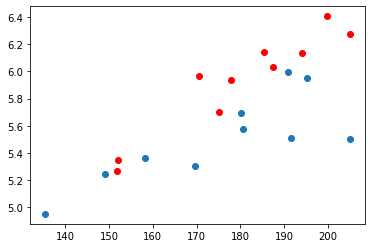

In [21]:
fig=plt.figure()
ax=plt.axes()
ax.scatter(simple_data['halo']['kontras'],simple_data['halo']['entropi'])
ax.scatter(simple_data['hai']['kontras'],simple_data['hai']['entropi'],c='red')

In [22]:
x=df[['kontras','entropi']]
y=df['jenis']
#y=f(x)

In [34]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=2)

In [40]:
a=np.array([[155.0,5.4]])
knn.predict(a)

array(['hai'], dtype=object)

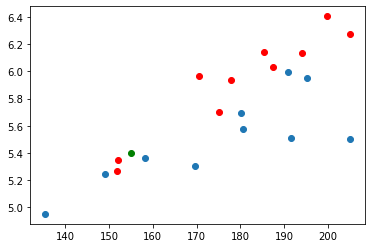

In [41]:
fig=plt.figure()
ax=plt.axes()
ax.scatter(simple_data['halo']['kontras'],simple_data['halo']['entropi'])
ax.scatter(simple_data['hai']['kontras'],simple_data['hai']['entropi'],c='red')
ax.scatter(155.0,5.4,c='green')